# Machine Learning Analysis on Covertype Dataset
## Comprehensive ML Pipeline: PCA, Logistic Regression, SVM, Neural Network, K-Means, and DBSCAN

## 1. Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             silhouette_score, silhouette_samples)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
RANDOM_STATE=42

## 2. Load and Explore Dataset

In [4]:
# Load the dataset
from google.colab import drive
drive.mount('/mnt/drive')
df = pd.read_csv('/mnt/drive/MyDrive/Forest Cover Type Dataset/covtype.csv')

Mounted at /mnt/drive


In [5]:
# Use a sample for faster computation (50% sample)
df = df.sample(frac=0.5, random_state=42)

# Display basic information
print("Dataset Shape:", df.shape)
print("(Using 50% sample for faster computation)")
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum().sum())
print("\nBasic Statistics:")
df.describe().T

Dataset Shape: (290506, 55)
(Using 50% sample for faster computation)

First few rows:
        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
250728       3351     206     27                               726   
246788       2732     129      7                               212   
407714       2572      24      9                               201   
25713        2824      69     13                               417   
21820        2529      84      5                               120   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
250728                             124                             3813   
246788                               1                             1082   
407714                              25                              957   
25713                               39                             3223   
21820                                9                             1092   

        Hillshade_9am  Hillshade_Noon  Hi

,count,mean,std,min,25%,50%,75%,max
Elevation,290506.0,2959.158720,279.859278,1863.0,2808.0,2995.0,3163.0,3858.0
Aspect,290506.0,155.632878,111.802536,0.0,59.0,127.0,260.0,360.0
Slope,290506.0,14.103488,7.489588,0.0,9.0,13.0,18.0,65.0
Horizontal_Distance_To_Hydrology,290506.0,268.986190,212.443586,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,290506.0,46.362044,58.195488,-173.0,7.0,30.0,69.0,599.0
Horizontal_Distance_To_Roadways,290506.0,2348.254046,1558.601695,0.0,1106.0,1995.0,3322.0,7116.0
Hillshade_9am,290506.0,212.173897,26.789096,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,290506.0,223.358805,19.737458,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,290506.0,142.527139,38.302504,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,290506.0,1977.831033,1322.063667,0.0,1022.0,1710.0,2547.0,7172.0


## 3. Data Preprocessing and Feature Scaling

Unique classes in target: [1 2 3 5 6 7 4]

Class distribution (counts):
Cover_Type
2    141813
1    105629
3     17895
7     10233
6      8708
5      4876
4      1352
Name: count, dtype: int64

Class distribution (proportions):
Cover_Type
2    0.488159
1    0.363604
3    0.061599
7    0.035225
6    0.029975
5    0.016785
4    0.004654
Name: proportion, dtype: float64


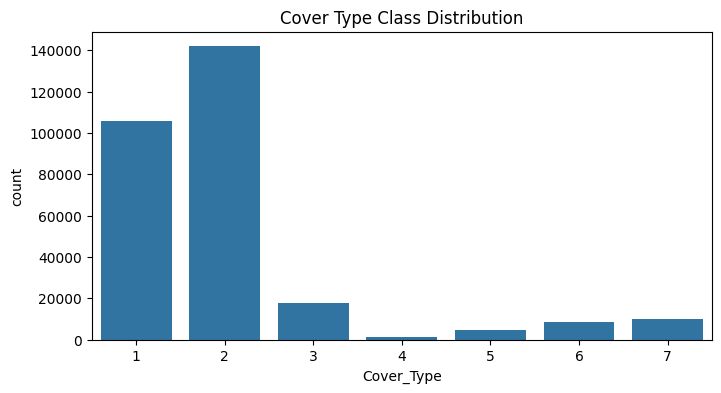

In [6]:
target_col = "Cover_Type"

print("Unique classes in target:", df[target_col].unique())
print("\nClass distribution (counts):")
print(df[target_col].value_counts())

print("\nClass distribution (proportions):")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(8, 4))
sns.countplot(x=target_col, data=df)
plt.title("Cover Type Class Distribution")
plt.show()

In [7]:
# Known continuous columns in this dataset (standard Forest Cover Type)
continuous_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Everything else except target and continuous is treated as categorical/binary
other_cols = [c for c in df.columns if c not in continuous_cols + [target_col]]

print("Continuous columns:", continuous_cols)
print("\nOther columns (likely wilderness/soil one-hots):")
print(other_cols)


Continuous columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Other columns (likely wilderness/soil one-hots):
['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


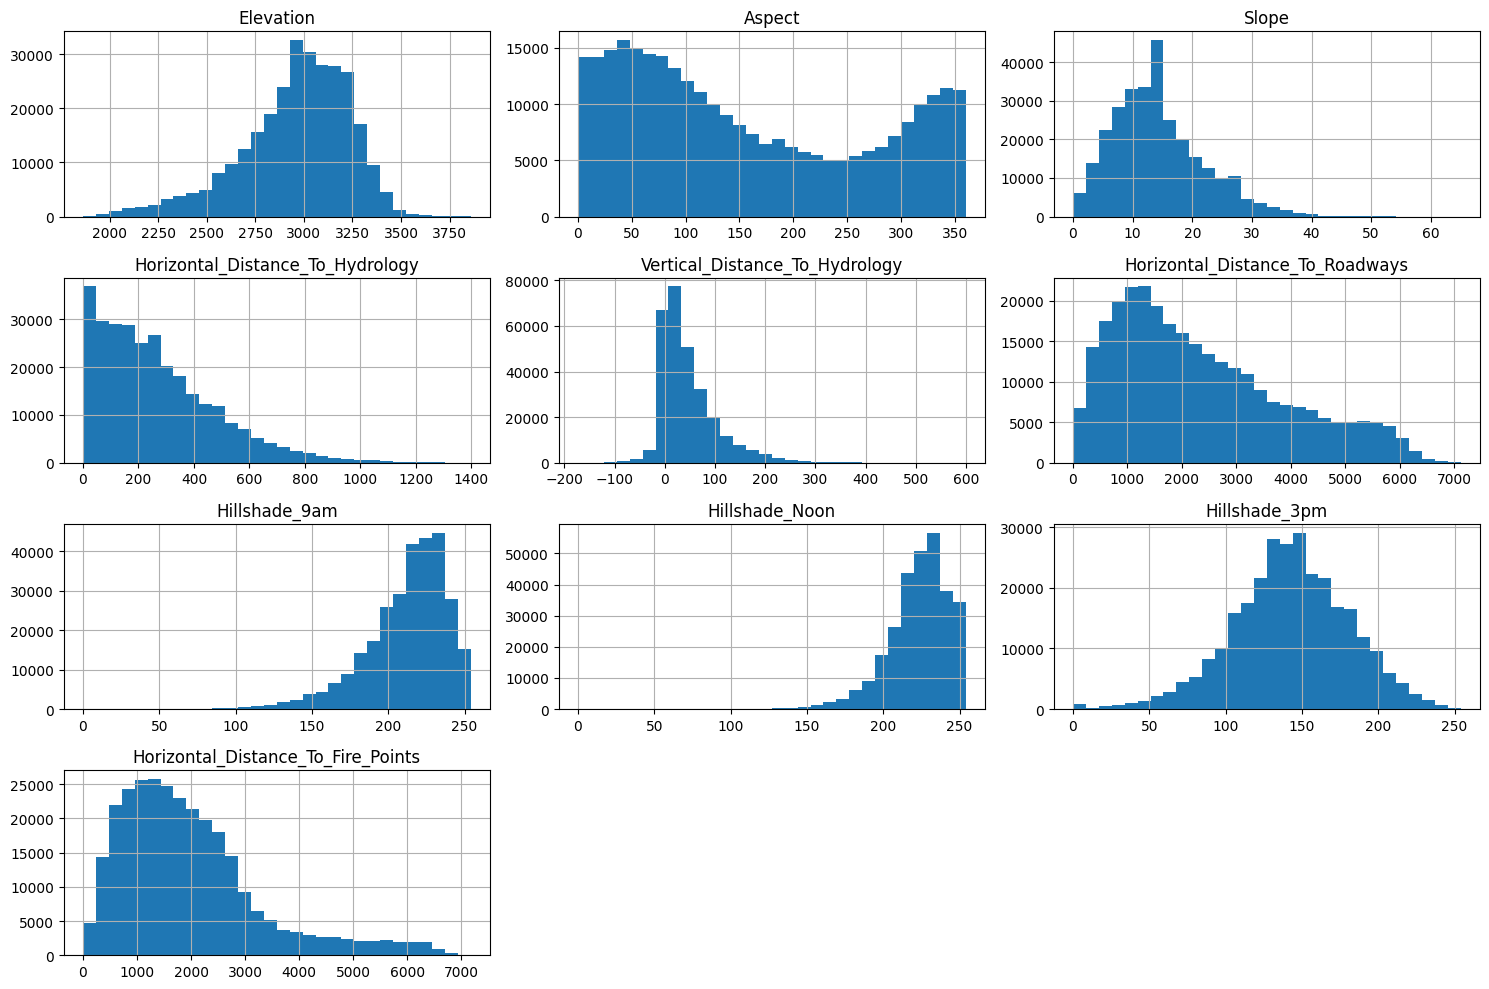

In [8]:
df[continuous_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


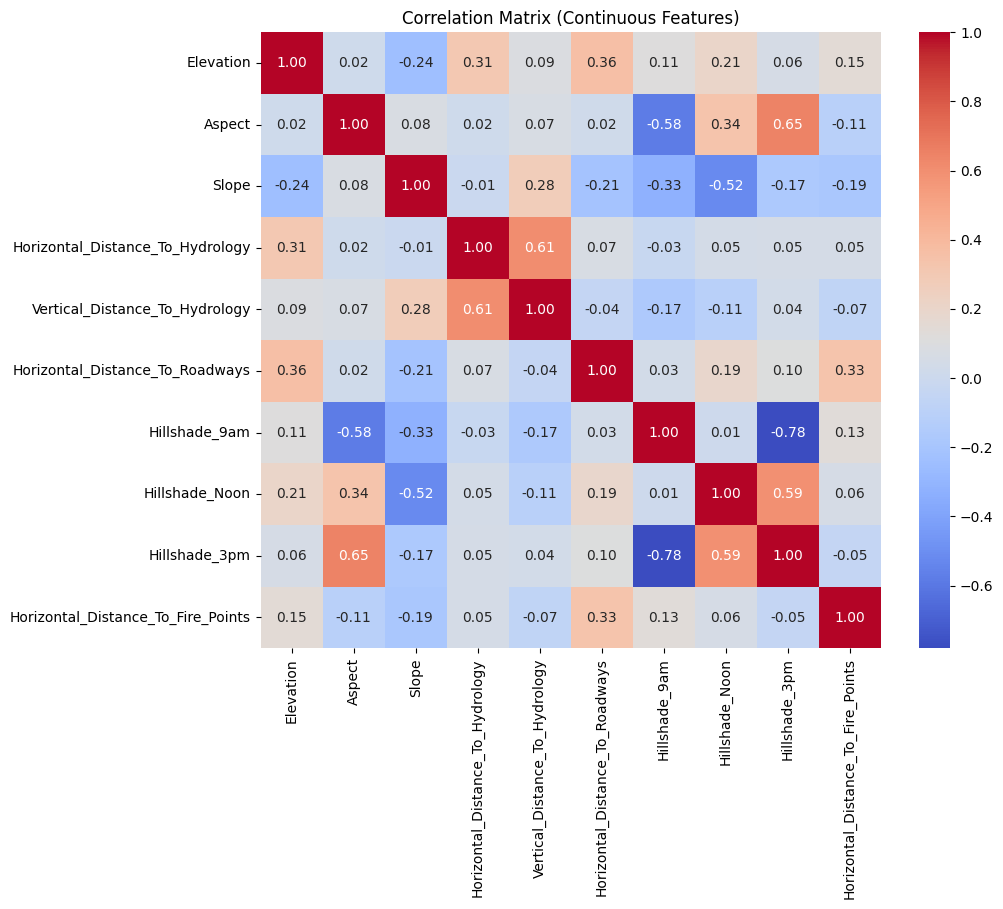

In [9]:
plt.figure(figsize=(10, 8))
corr = df[continuous_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Continuous Features)")
plt.show()

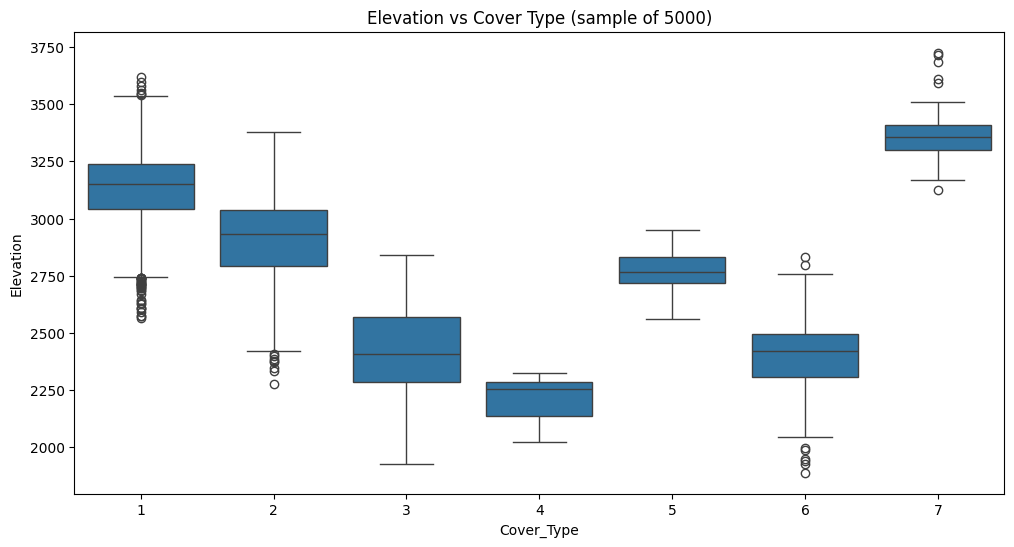

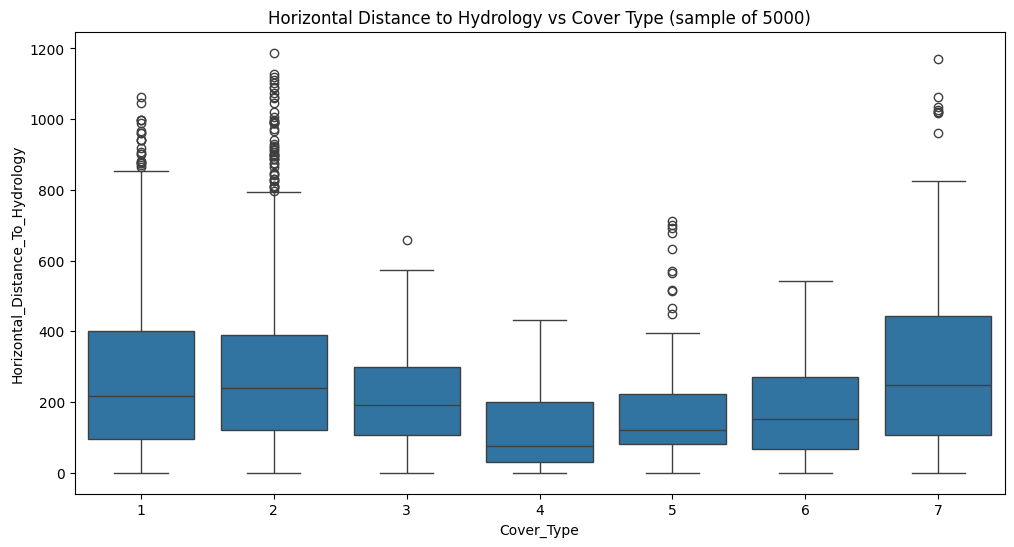

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col, y='Elevation', data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Elevation vs Cover Type (sample of 5000)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col, y='Horizontal_Distance_To_Hydrology',
            data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Horizontal Distance to Hydrology vs Cover Type (sample of 5000)")
plt.show()

Wilderness columns: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
Number of Soil_Type columns: 40

Wilderness Area counts:
Wilderness_Area1    130568
Wilderness_Area2     14820
Wilderness_Area3    126742
Wilderness_Area4     18376
dtype: int64

Top 10 most common soil types:
Soil_Type29    57799
Soil_Type23    28765
Soil_Type32    26177
Soil_Type33    22482
Soil_Type22    16579
Soil_Type10    16324
Soil_Type30    15074
Soil_Type12    14924
Soil_Type31    12801
Soil_Type24    10714
dtype: int64


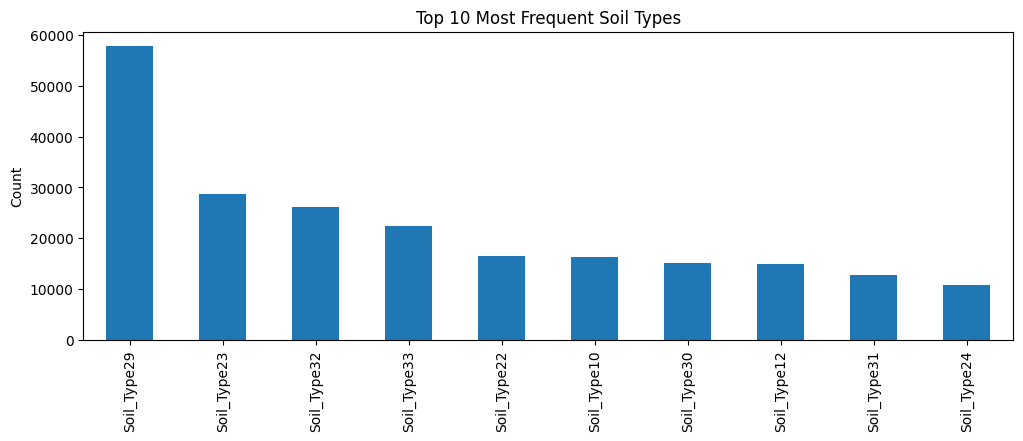

In [13]:
# Wilderness columns usually start with 'Wilderness_Area'
wilderness_cols = [c for c in df.columns if c.startswith("Wilderness_Area")]
soil_cols = [c for c in df.columns if c.startswith("Soil_Type")]

print("Wilderness columns:", wilderness_cols)
print("Number of Soil_Type columns:", len(soil_cols))

# Count how many samples in each wilderness area
print("\nWilderness Area counts:")
print(df[wilderness_cols].sum())

# Count how many samples for each soil type
soil_counts = df[soil_cols].sum().sort_values(ascending=False)
print("\nTop 10 most common soil types:")
print(soil_counts.head(10))

plt.figure(figsize=(12, 4))
soil_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Frequent Soil Types")
plt.ylabel("Count")
plt.show()


In [14]:
df['Hydro_Euclidean'] = np.sqrt(
    df['Horizontal_Distance_To_Hydrology']**2 +
    df['Vertical_Distance_To_Hydrology']**2
)

print(df[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
          'Hydro_Euclidean']].head())


        Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
250728                               726                             124   
246788                               212                               1   
407714                               201                              25   
25713                                417                              39   
21820                                120                               9   

        Hydro_Euclidean  
250728       736.513408  
246788       212.002358  
407714       202.548760  
25713        418.819770  
21820        120.337027  


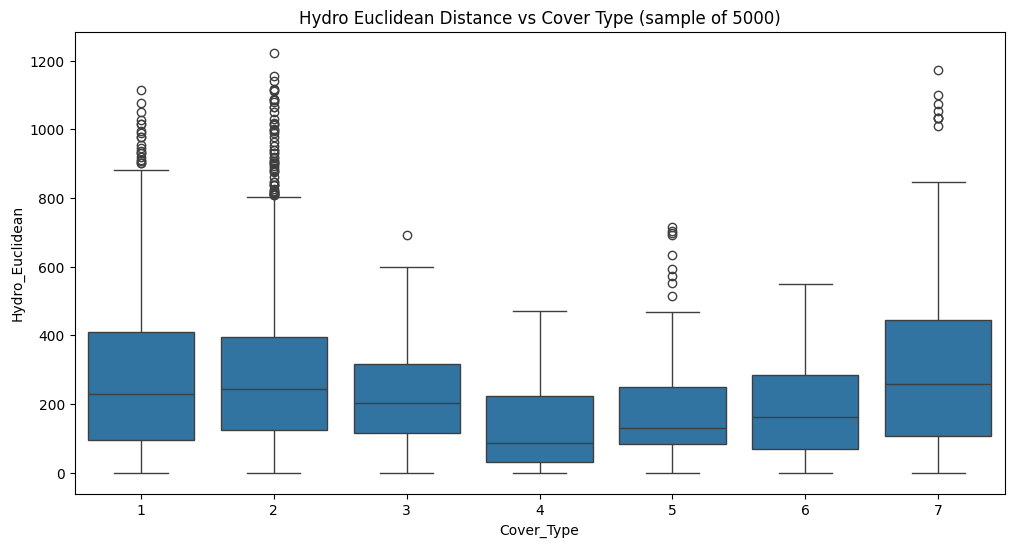

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col,
            y='Hydro_Euclidean',
            data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Hydro Euclidean Distance vs Cover Type (sample of 5000)")
plt.show()


In [16]:
# Drop rows with any NaN values in X or y
df.dropna(inplace=True)

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Check class distribution
print("Class Distribution:")
print(y.value_counts().sort_index())
print(f"\nNumber of Features: {X.shape[1]}")
print(f"Number of Samples: {X.shape[0]}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures scaled successfully!")
print(f"Scaled data shape: {X_scaled.shape}")

Class Distribution:
Cover_Type
1    105629
2    141813
3     17895
4      1352
5      4876
6      8708
7     10233
Name: count, dtype: int64

Number of Features: 55
Number of Samples: 290506

Features scaled successfully!
Scaled data shape: (290506, 55)


## 4. Principal Component Analysis (PCA)

Original number of features: 54
Reduced number of features after PCA: 42
Explained variance ratio: 0.9623
Dimensionality reduction: 22.22%


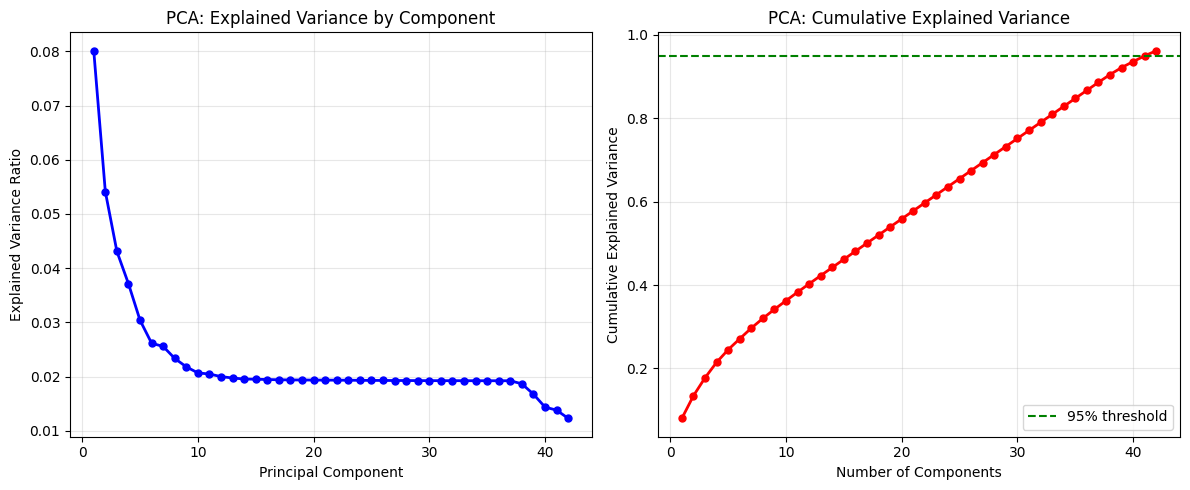


Top 10 components explaining most variance:
PC1: 0.0801 (0.0801 cumulative)
PC2: 0.0541 (0.1342 cumulative)
PC3: 0.0431 (0.1773 cumulative)
PC4: 0.0371 (0.2145 cumulative)
PC5: 0.0304 (0.2449 cumulative)
PC6: 0.0262 (0.2710 cumulative)
PC7: 0.0256 (0.2966 cumulative)
PC8: 0.0233 (0.3199 cumulative)
PC9: 0.0218 (0.3417 cumulative)
PC10: 0.0207 (0.3624 cumulative)


In [ ]:
# Apply PCA to reduce dimensionality while retaining 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Dimensionality reduction: {(1 - X_pca.shape[1]/X_scaled.shape[1])*100:.2f}%")

# Visualize explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'ro-', linewidth=2, markersize=5)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTop 10 components explaining most variance:")
for i, var in enumerate(pca.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {var:.4f} ({cumulative_var[i]:.4f} cumulative)")

## 5. Logistic Regression

In [ ]:
# Split data for supervised learning (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression with RandomizedSearchCV for faster tuning
print("Training Logistic Regression with RandomizedSearchCV...")
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000]
}

lr_model = LogisticRegression(random_state=42)
lr_search = RandomizedSearchCV(lr_model, lr_params, n_iter=4, cv=3, n_jobs=-1, random_state=42)
lr_search.fit(X_train, y_train)
lr_model = lr_search.best_estimator_

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression Results:")
print(f"Best Parameters: {lr_search.best_params_}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision (weighted): {lr_precision:.4f}")
print(f"Recall (weighted): {lr_recall:.4f}")
print(f"F1-Score (weighted): {lr_f1:.4f}")

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Training Logistic Regression with RandomizedSearchCV...

Logistic Regression Results:
Best Parameters: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 10}
Accuracy: 0.8150
Precision (weighted): 0.8106
Recall (weighted): 0.8150
F1-Score (weighted): 0.8021

Confusion Matrix:
[[1567 1451    0    0   15    0   32]
 [ 328 8268    4    0   48   18    0]
 [   0    1  164   59   11   80    0]
 [   0    0   23  267    0   23    0]
 [   5  184    5    0  168   12    0]
 [   0   11   81   21    9  196    0]
 [  52    0    0    0    1    0  268]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.51      0.62      3065
         2.0       0.83      0.95      0.89      8666
         3.0       0.59      0.52      0.55       315
         4.0       0.77      0.85      0.81       313
         5.0       0.67      0.45      0.54       374
         6.0       0.60      0.62      0.61       318
         7.0       0.89      0.83      0.86       321

    ac

## 6. Support Vector Machine (SVM)

In [ ]:
# Train SVM with RandomizedSearchCV for faster hyperparameter tuning
print("Training Support Vector Machine (SVM) with RandomizedSearchCV...")
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
svm_search = RandomizedSearchCV(svm_model, svm_params, n_iter=6, cv=3, n_jobs=-1, random_state=42)
svm_search.fit(X_train, y_train)
svm_model = svm_search.best_estimator_

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSupport Vector Machine (SVM) Results:")
print(f"Best Parameters: {svm_search.best_params_}")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision (weighted): {svm_precision:.4f}")
print(f"Recall (weighted): {svm_recall:.4f}")
print(f"F1-Score (weighted): {svm_f1:.4f}")

print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Training Support Vector Machine (SVM) with RandomizedSearchCV...

Support Vector Machine (SVM) Results:
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Accuracy: 0.8588
Precision (weighted): 0.8586
Recall (weighted): 0.8588
F1-Score (weighted): 0.8515

Confusion Matrix:
[[1853 1173    0    0    9    1   29]
 [ 263 8347    6    0   30   17    3]
 [   0    4  218   33    3   57    0]
 [   0    0   21  283    0    9    0]
 [  11   98    8    0  253    4    0]
 [   2    1   72   14    2  227    0]
 [  16    2    0    0    0    0  303]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.60      0.71      3065
         2.0       0.87      0.96      0.91      8666
         3.0       0.67      0.69      0.68       315
         4.0       0.86      0.90      0.88       313
         5.0       0.85      0.68      0.75       374
         6.0       0.72      0.71      0.72       318
         7.0       0.90      0.94      0.92  

## 7. Neural Network Classification

Building and Training Neural Network (MLPClassifier)...
Training progress...

Neural Network (MLPClassifier) Results:
Accuracy: 0.8687
Precision (weighted): 0.8663
Recall (weighted): 0.8687
F1-Score (weighted): 0.8659

Confusion Matrix:
[[2192  837    0    0    9    3   24]
 [ 396 8190    6    0   53   20    1]
 [   0    2  192   39    9   73    0]
 [   0    0   16  283    0   14    0]
 [  10   91    8    0  259    6    0]
 [   0    2   72   23    6  214    1]
 [  33    2    0    0    0    0  286]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.72      0.77      3065
         2.0       0.90      0.95      0.92      8666
         3.0       0.65      0.61      0.63       315
         4.0       0.82      0.90      0.86       313
         5.0       0.77      0.69      0.73       374
         6.0       0.65      0.67      0.66       318
         7.0       0.92      0.89      0.90       321

    accuracy                          

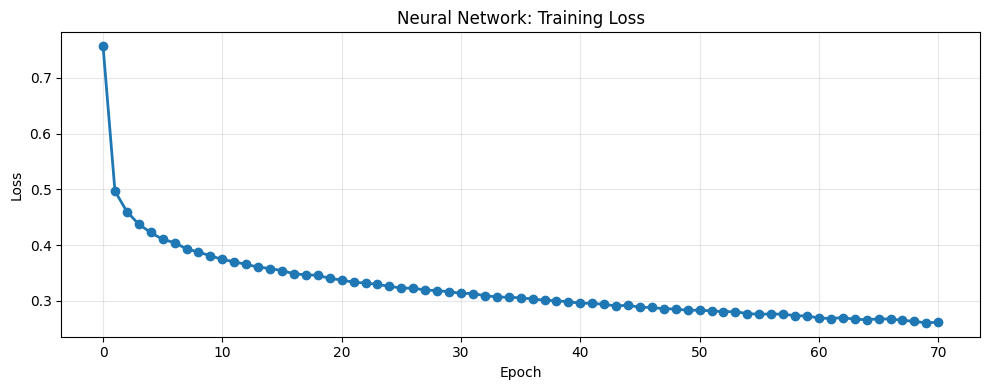

In [ ]:
# Build and Train Neural Network using scikit-learn
print("Building and Training Neural Network (MLPClassifier)...")

model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    batch_size=128,
    random_state=42,
    early_stopping=True # Keep early stopping enabled
)

print("Training progress...")
model.fit(X_train, y_train)

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn_probs = model.predict_proba(X_test)

# Evaluate
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')

print("\nNeural Network (MLPClassifier) Results:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision (weighted): {nn_precision:.4f}")
print(f"Recall (weighted): {nn_recall:.4f}")
print(f"F1-Score (weighted): {nn_f1:.4f}")

print("\nConfusion Matrix:")
cm_nn = confusion_matrix(y_test, y_pred_nn)
print(cm_nn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(model.loss_curve_, marker='o', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network: Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with RandomizedSearchCV for faster hyperparameter tuning
print("Training Random Forest with RandomizedSearchCV...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2','logloss'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_params, n_iter=5, cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
rf_model = rf_search.best_estimator_

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Results:")
print(f"Best Parameters: {rf_search.best_params_}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision (weighted): {rf_precision:.4f}")
print(f"Recall (weighted): {rf_recall:.4f}")
print(f"F1-Score (weighted): {rf_f1:.4f}")

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Training Random Forest with RandomizedSearchCV...

Random Forest Results:
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Accuracy: 0.8960
Precision (weighted): 0.8955
Recall (weighted): 0.8960
F1-Score (weighted): 0.8936

Confusion Matrix:
[[2310  726    0    0   11    1   17]
 [ 239 8373    7    0   27   18    2]
 [   0    2  213   35    2   63    0]
 [   0    0   13  284    0   16    0]
 [  10   82    7    0  266    9    0]
 [   0    3   59   14    3  239    0]
 [  23    2    0    0    0    0  296]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.75      0.82      3065
         2.0       0.91      0.97      0.94      8666
         3.0       0.71      0.68      0.69       315
         4.0       0.85      0.91      0.88       313
         5.0       0.86      0.71      0.78       374
         6.0       0.69      0.75      0.72       318
         7

# Task
To address the clustering evaluation, I will first define a helper function to map cluster labels to the most frequent actual 'Cover_Type' labels within each cluster.

Then, I will modify the K-Means evaluation section to apply this mapping, and calculate and print accuracy, weighted F1-score, and weighted precision using the true labels (`y_test`) for comparison. This will replace the previous inertia metric for K-Means.

This will be done by adding a new code cell before the K-Means evaluation, and then modifying the K-Means evaluation cell (`557f008e`).

```python
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Helper function to map cluster labels to actual labels
def map_cluster_labels(cluster_labels, true_labels):
    """
    Maps cluster labels to the most frequent true labels within each cluster.
    Returns a mapping dictionary and the re-mapped labels.
    """
    # Ensure true_labels is an array for proper indexing
    true_labels_array = np.array(true_labels)

    # Find unique cluster labels (excluding noise if present, though K-Means won't have it)
    unique_clusters = np.unique(cluster_labels[cluster_labels != -1])

    # Initialize a mapping for cluster labels to true labels
    cluster_to_true_label = {}
    
    # Iterate through each unique cluster
    for cluster_id in unique_clusters:
        # Get the true labels for points belonging to this cluster
        true_labels_in_cluster = true_labels_array[cluster_labels == cluster_id]
        
        # If the cluster is not empty, find the most frequent true label
        if len(true_labels_in_cluster) > 0:
            most_common_label = Counter(true_labels_in_cluster).most_common(1)[0][0]
            cluster_to_true_label[cluster_id] = most_common_label
        else:
            # Handle empty clusters if necessary, perhaps by assigning a default or skipping
            cluster_to_true_label[cluster_id] = -1 # Indicate no mapping or noise
            
    # Apply the mapping to the cluster_labels
    mapped_labels = np.array([cluster_to_true_label.get(label, -1) for label in cluster_labels])
    
    return mapped_labels, cluster_to_true_label

# --- For K-Means, we need to ensure y is aligned with X_pca for label mapping ---
# Currently X_pca is from all data, y is also from all data, but `kmeans_labels` are based on `X_pca`.
# We are doing supervised metrics on clustering, so we need to split y consistent with X_pca.
# This means we need to align `y` with `X_pca` before splitting into train/test,
# or simply use the full `y` for evaluation of full `X_pca` clustering.
# Given that the supervised models were trained on X_train/X_test,
# for consistency in evaluation, we should split `X_pca` and `y` for clustering as well,
# or evaluate K-Means on the full dataset, if we want to compare clustering on the entire dataset.

# For this task, let's evaluate K-Means on the full X_pca and y dataset,
# as clustering is typically unsupervised and evaluated on the entire dataset.
# The `y` variable is the true labels for the entire dataset `df`.
```

In [ ]:
def map_cluster_labels(cluster_labels, true_labels):
    """
    Maps cluster labels to the most frequent true labels within each cluster.
    """
    # Create a DataFrame for easier manipulation
    df_mapping = pd.DataFrame({'cluster': cluster_labels, 'true_label': true_labels})

    # Initialize an empty dictionary to store the mapping from cluster label to true label
    cluster_to_true_label = {}

    # Iterate over each unique cluster label
    for cluster_id in sorted(df_mapping['cluster'].unique()):
        # Get all true labels for the current cluster
        true_labels_in_cluster = df_mapping[df_mapping['cluster'] == cluster_id]['true_label']
        if not true_labels_in_cluster.empty:
            # Find the most frequent true label in this cluster
            most_frequent_true_label = true_labels_in_cluster.mode()[0]
            cluster_to_true_label[cluster_id] = most_frequent_true_label
        else:
            # Handle empty clusters, assign an arbitrary default or skip
            cluster_to_true_label[cluster_id] = -1 # Or a label not present in true_labels

    # Apply the mapping to the cluster labels
    mapped_labels = np.array([cluster_to_true_label.get(label, -1) for label in cluster_labels])
    return mapped_labels

print("Helper function `map_cluster_labels` defined successfully.")

Helper function `map_cluster_labels` defined successfully.


Applying Elbow Method for K-Means...


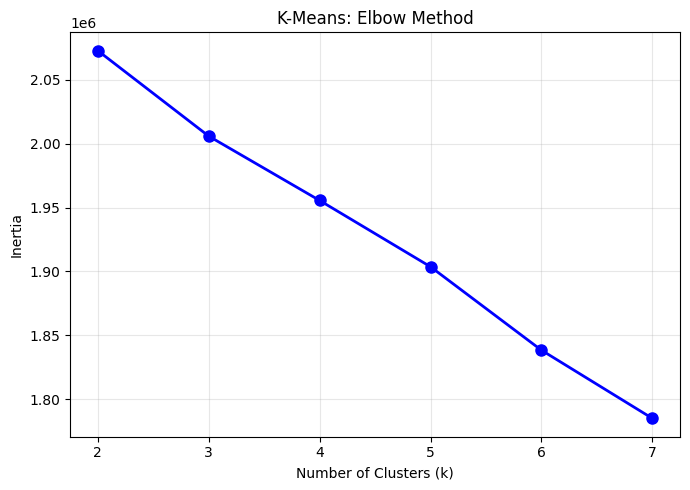


Training K-Means with k=4...

K-Means Results (k=4):
Accuracy: 0.6613
Precision (weighted): 0.4862
Recall (weighted): 0.6613
F1-Score (weighted): 0.5524
Cluster sizes: [11584  5440 27378   169]


In [ ]:
# Elbow method to find optimal clusters (reduced range for speed)
print("Applying Elbow Method for K-Means...")
inertias = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7, 5))

plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means: Elbow Method')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Train K-Means with optimal clusters (use 4 as an example based on typical forest cover types)
optimal_k = 4
print(f"\nTraining K-Means with k={optimal_k}...")
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=5)
kmeans_labels = kmeans_model.fit_predict(X_pca)

# Evaluate K-Means using the custom mapping function and classification metrics
# Call the helper function to map cluster labels to actual labels
mapped_kmeans_labels = map_cluster_labels(kmeans_labels, y)

# Calculate evaluation metrics. Set zero_division=0 to handle cases where a class has no predicted samples.
kmeans_accuracy = accuracy_score(y, mapped_kmeans_labels)
kmeans_precision = precision_score(y, mapped_kmeans_labels, average='weighted', zero_division=0)
kmeans_recall = recall_score(y, mapped_kmeans_labels, average='weighted', zero_division=0)
kmeans_f1 = f1_score(y, mapped_kmeans_labels, average='weighted', zero_division=0)

print(f"\nK-Means Results (k={optimal_k}):")
print(f"Accuracy: {kmeans_accuracy:.4f}")
print(f"Precision (weighted): {kmeans_precision:.4f}")
print(f"Recall (weighted): {kmeans_recall:.4f}")
print(f"F1-Score (weighted): {kmeans_f1:.4f}")
print(f"Cluster sizes: {np.bincount(kmeans_labels)}")

In [ ]:
print("Training DBSCAN Clustering...")
eps_values = [0.75, 1.0, 1.25]
dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_pca)

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    # Use the helper function to map cluster labels to actual labels
    mapped_dbscan_labels = map_cluster_labels(dbscan_labels, y)

    # Filter out noise points (labeled -1) for evaluation
    non_noise_mask = (dbscan_labels != -1)
    filtered_y_true = y[non_noise_mask]
    filtered_y_pred = mapped_dbscan_labels[non_noise_mask]

    # Calculate evaluation metrics for DBSCAN
    # Ensure filtered_y_true and filtered_y_pred are not empty before calculating metrics
    if len(filtered_y_true) > 0 and len(np.unique(filtered_y_true)) > 1:
        dbscan_accuracy = accuracy_score(filtered_y_true, filtered_y_pred)
        dbscan_precision = precision_score(filtered_y_true, filtered_y_pred, average='weighted', zero_division=0)
        dbscan_recall = recall_score(filtered_y_true, filtered_y_pred, average='weighted', zero_division=0)
        dbscan_f1 = f1_score(filtered_y_true, filtered_y_pred, average='weighted', zero_division=0)
    else:
        # Assign 0 or NaN if no valid points for evaluation after filtering noise
        dbscan_accuracy = 0.0
        dbscan_precision = 0.0
        dbscan_recall = 0.0
        dbscan_f1 = 0.0

    dbscan_results.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'labels': dbscan_labels,
        'accuracy': dbscan_accuracy,
        'precision': dbscan_precision,
        'recall': dbscan_recall,
        'f1_score': dbscan_f1
    })

    print(f"\neps={eps}:")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Number of noise points: {n_noise}")
    print(f"  Accuracy (non-noise): {dbscan_accuracy:.4f}")
    print(f"  Precision (weighted, non-noise): {dbscan_precision:.4f}")
    print(f"  Recall (weighted, non-noise): {dbscan_recall:.4f}")
    print(f"  F1-Score (weighted, non-noise): {dbscan_f1:.4f}")

# Select best DBSCAN configuration (e.g., the one with the highest F1-score among those with reasonable clusters)
# For simplicity, let's pick the one with the highest f1_score for demonstration
best_result = max(dbscan_results, key=lambda x: x['f1_score'] if x['f1_score'] is not None else -1)

print(f"\n\nSelected DBSCAN Configuration (eps={best_result['eps']}):")
print(f"Number of clusters: {best_result['n_clusters']}")
print(f"Number of noise points: {best_result['n_noise']}")
print(f"Accuracy (non-noise): {best_result['accuracy']:.4f}")
print(f"Precision (weighted, non-noise): {best_result['precision']:.4f}")
print(f"Recall (weighted, non-noise): {best_result['recall']:.4f}")
print(f"F1-Score (weighted, non-noise): {best_result['f1_score']:.4f}")

Training DBSCAN Clustering...

eps=0.75:
  Number of clusters: 202
  Number of noise points: 3779
  Accuracy (non-noise): 0.7584
  Precision (weighted, non-noise): 0.7381
  Recall (weighted, non-noise): 0.7584
  F1-Score (weighted, non-noise): 0.7073

eps=1.0:
  Number of clusters: 137
  Number of noise points: 1766
  Accuracy (non-noise): 0.7447
  Precision (weighted, non-noise): 0.7197
  Recall (weighted, non-noise): 0.7447
  F1-Score (weighted, non-noise): 0.6961

eps=1.25:
  Number of clusters: 104
  Number of noise points: 931
  Accuracy (non-noise): 0.7377
  Precision (weighted, non-noise): 0.7086
  Recall (weighted, non-noise): 0.7377
  F1-Score (weighted, non-noise): 0.6920


Selected DBSCAN Configuration (eps=0.75):
Number of clusters: 202
Number of noise points: 3779
Accuracy (non-noise): 0.7584
Precision (weighted, non-noise): 0.7381
Recall (weighted, non-noise): 0.7584
F1-Score (weighted, non-noise): 0.7073


SUPERVISED LEARNING MODELS COMPARISON
                 Model  Accuracy  Precision   Recall  F1-Score
   Logistic Regression  0.814987   0.810636 0.814987  0.802057
Support Vector Machine  0.858809   0.858578 0.858809  0.851505
        Neural Network  0.868681   0.866265 0.868681  0.865913
         Random Forest  0.895977   0.895454 0.895977  0.893551

Best Model (by Accuracy): Random Forest


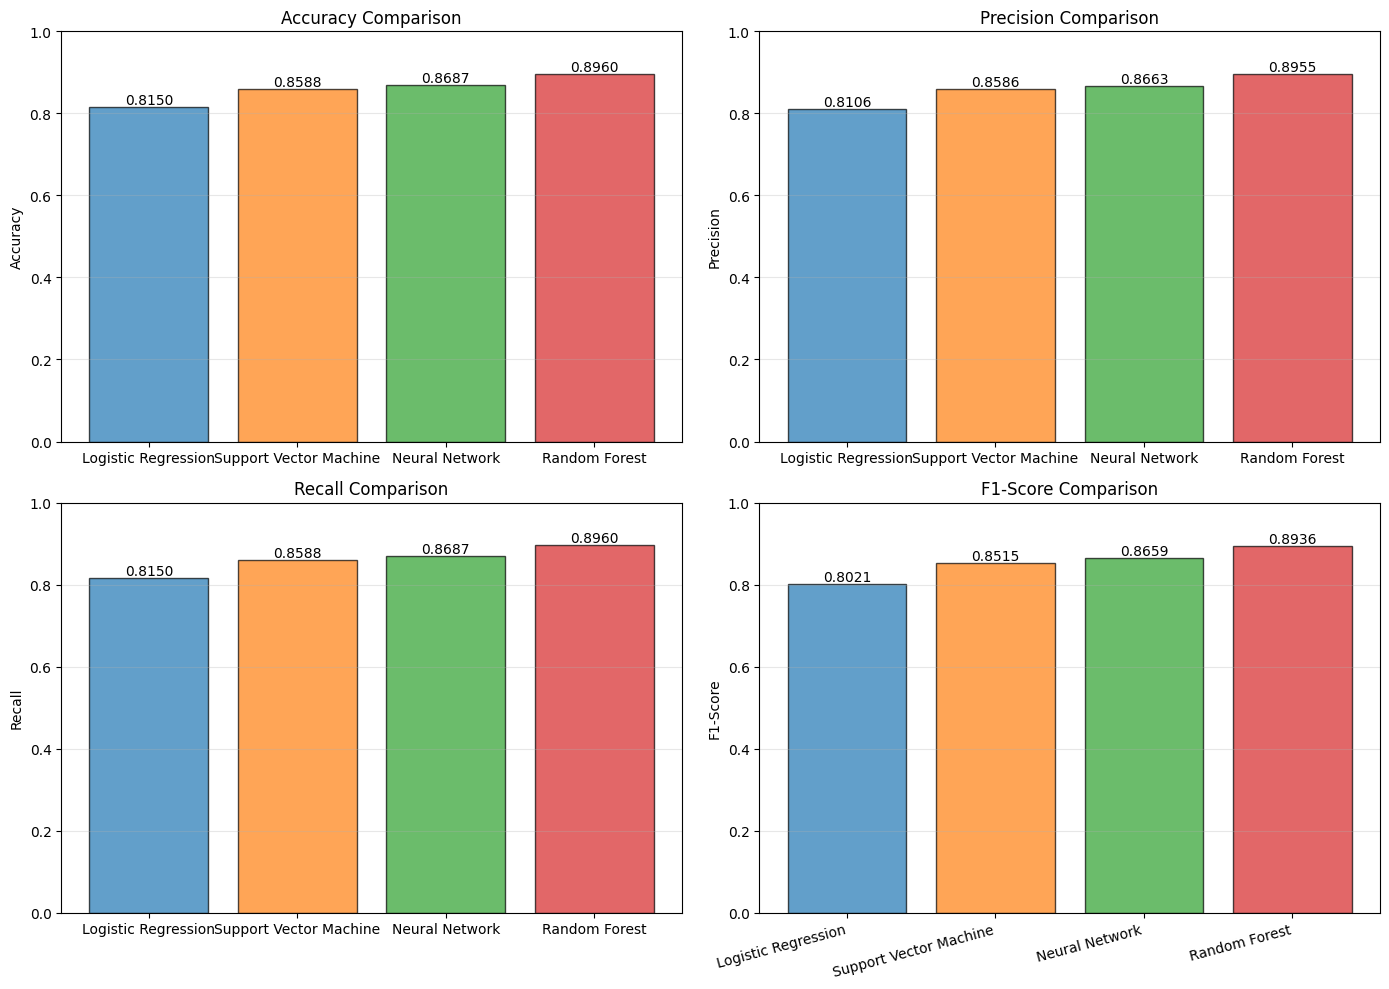


CLUSTERING MODELS COMPARISON
Algorithm  Number of Clusters Number of Noise Points  Accuracy  Precision   Recall  F1-Score
  K-Means                   4                    N/A  0.661304   0.486202 0.661304  0.552441
   DBSCAN                 202                   3779  0.758409   0.738114 0.758409  0.707272


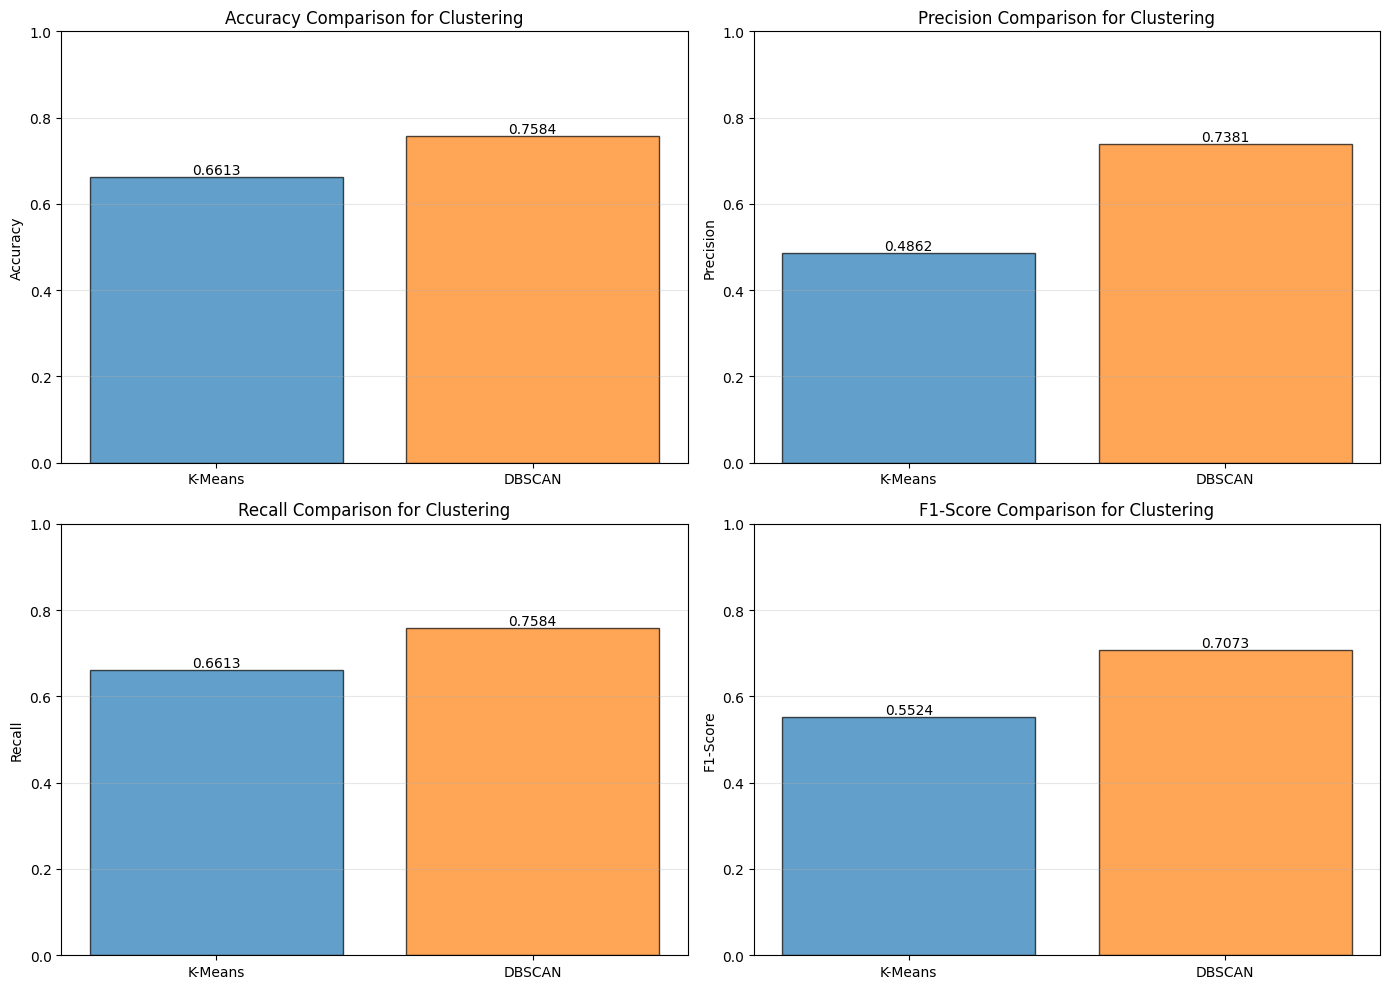

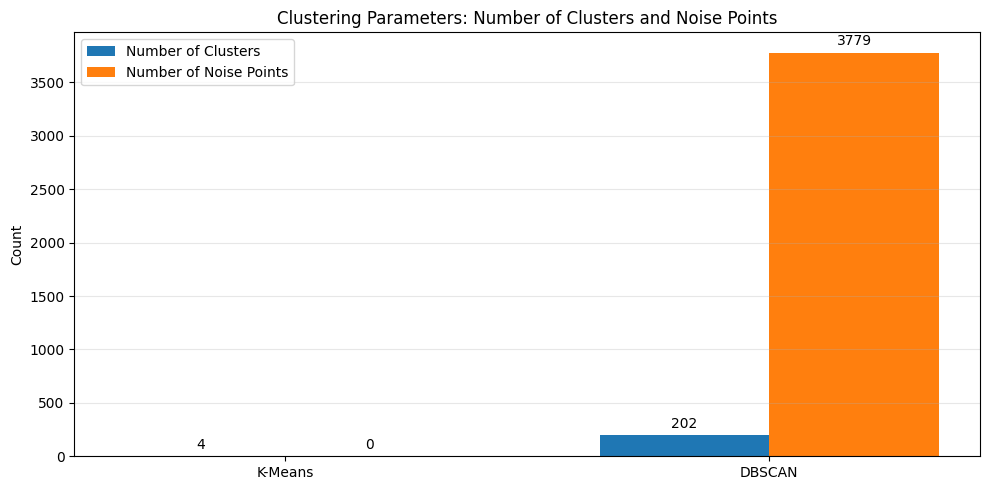


SUMMARY

Dataset Information:
  - Total Samples: 44571
  - Original Features: 54
  - Reduced Features (after PCA): 42
  - Dimensionality Reduction: 22.22%
  - Number of Classes: 7

Supervised Learning:
  - Best Model: Random Forest
  - Best Accuracy: 0.8960

Unsupervised Learning:
  - K-Means (k=4):
    - Accuracy: 0.6613
    - Precision: 0.4862
    - Recall: 0.6613
    - F1-Score: 0.5524
  - DBSCAN (eps=0.75):
    - Number of Clusters: 202
    - Number of Noise Points: 3779
    - Accuracy (non-noise): 0.7584
    - Precision (non-noise): 0.7381
    - Recall (non-noise): 0.7584
    - F1-Score (non-noise): 0.7073


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create comparison table for supervised models
supervised_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Neural Network', 'Random Forest'],
    'Accuracy': [lr_accuracy, svm_accuracy, nn_accuracy, rf_accuracy],
    'Precision': [lr_precision, svm_precision, nn_precision, rf_precision],
    'Recall': [lr_recall, svm_recall, nn_recall, rf_recall],
    'F1-Score': [lr_f1, svm_f1, nn_f1, rf_f1]
})

print("="*80)
print("SUPERVISED LEARNING MODELS COMPARISON")
print("="*80)
print(supervised_comparison.to_string(index=False))
print("\nBest Model (by Accuracy):", supervised_comparison.loc[supervised_comparison['Accuracy'].idxmax(), 'Model'])

# Visualize supervised model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = supervised_comparison[metric].values
    models = supervised_comparison['Model'].values
    bars = ax.bar(models, values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# Create comparison table for clustering models (now including new metrics)
clustering_comparison = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN'],
    'Number of Clusters': [optimal_k, best_result['n_clusters']],
    'Number of Noise Points': ['N/A', best_result['n_noise']], # K-Means doesn't have noise points by definition
    'Accuracy': [kmeans_accuracy, best_result['accuracy']],
    'Precision': [kmeans_precision, best_result['precision']],
    'Recall': [kmeans_recall, best_result['recall']],
    'F1-Score': [kmeans_f1, best_result['f1_score']]
})

print("\n" + "="*80)
print("CLUSTERING MODELS COMPARISON")
print("="*80)
print(clustering_comparison.to_string(index=False))

# Visualize clustering model comparison, including new performance metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

clustering_metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
cluster_colors = ['#1f77b4', '#ff7f0e'] # Using blue for K-Means, orange for DBSCAN

for idx, metric in enumerate(clustering_metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    values = clustering_comparison[metric].values
    algorithms_labels = clustering_comparison['Algorithm'].values
    bars = ax.bar(algorithms_labels, values, color=cluster_colors, alpha=0.7, edgecolor='black')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison for Clustering')
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Additional plot for Number of Clusters and Noise Points
fig, ax = plt.subplots(figsize=(10, 5))
num_clusters_values = clustering_comparison['Number of Clusters'].values.astype(float) # Convert to float for plotting
num_noise_values = [0 if v == 'N/A' else float(v) for v in clustering_comparison['Number of Noise Points'].values] # Convert 'N/A' to 0 for plotting

x = np.arange(len(algorithms))
width = 0.35

rects1 = ax.bar(x - width/2, num_clusters_values, width, label='Number of Clusters', color='#1f77b4')
rects2 = ax.bar(x + width/2, num_noise_values, width, label='Number of Noise Points', color='#ff7f0e')

ax.set_ylabel('Count')
ax.set_title('Clustering Parameters: Number of Clusters and Noise Points')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nDataset Information:")
print(f"  - Total Samples: {X.shape[0]}")
print(f"  - Original Features: {X.shape[1]}")
print(f"  - Reduced Features (after PCA): {X_pca.shape[1]}")
print(f"  - Dimensionality Reduction: {(1 - X_pca.shape[1]/X.shape[1])*100:.2f}%")
print(f"  - Number of Classes: {len(y.unique())}")

print(f"\nSupervised Learning:")
print(f"  - Best Model: {supervised_comparison.loc[supervised_comparison['Accuracy'].idxmax(), 'Model']}")
print(f"  - Best Accuracy: {supervised_comparison['Accuracy'].max():.4f}")

print(f"\nUnsupervised Learning:")
print(f"  - K-Means (k={optimal_k}):")
print(f"    - Accuracy: {kmeans_accuracy:.4f}")
print(f"    - Precision: {kmeans_precision:.4f}")
print(f"    - Recall: {kmeans_recall:.4f}")
print(f"    - F1-Score: {kmeans_f1:.4f}")
print(f"  - DBSCAN (eps={best_result['eps']}):")
print(f"    - Number of Clusters: {best_result['n_clusters']}")
print(f"    - Number of Noise Points: {best_result['n_noise']}")
print(f"    - Accuracy (non-noise): {best_result['accuracy']:.4f}")
print(f"    - Precision (non-noise): {best_result['precision']:.4f}")
print(f"    - Recall (non-noise): {best_result['recall']:.4f}")
print(f"    - F1-Score (non-noise): {best_result['f1_score']:.4f}")